<a href="https://colab.research.google.com/github/jhomolos/data_projects/blob/main/Regressao_Linear_Multipla_com_Scikit_419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício Prático**

Agora iremos prever preços de automóveis através de variáveis explicativas tratando as variáveis categóricas usando  LabelEncoder, normalizamosos os dados utilizando o MinMaxScaler, e por fim, utilizamos  método de ML de Regressão Linear. Por fim, calcularemos as métricas R², MAE, MSE e RSME.

In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [311]:
#importando o dataset
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [312]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Portanto, temos 10 variáveis categóricas, que são: CarName, fultype, aspiration, doornumber, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem. Elas devem ser tratadas usando a função do Scikit chamada  LabelEncoder.

In [314]:
le = LabelEncoder()

le.fit(df['CarName'])
df['CarName'] = le.transform(df['CarName'])
le.fit(df['fueltype'])
df['fueltype'] = le.transform(df['fueltype'])
le.fit(df['aspiration'])
df['aspiration'] = le.transform(df['aspiration'])
le.fit(df['doornumber'])
df['doornumber'] = le.transform(df['doornumber'])
le.fit(df['carbody'])
df['carbody'] = le.transform(df['carbody'])
le.fit(df['drivewheel'])
df['drivewheel'] = le.transform(df['drivewheel'])
le.fit(df['enginelocation'])
df['enginelocation'] = le.transform(df['enginelocation'])
le.fit(df['enginetype'])
df['enginetype'] = le.transform(df['enginetype'])
le.fit(df['cylindernumber'])
df['cylindernumber'] = le.transform(df['cylindernumber'])
le.fit(df['fuelsystem'])
df['fuelsystem'] = le.transform(df['fuelsystem'])
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [315]:
df.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


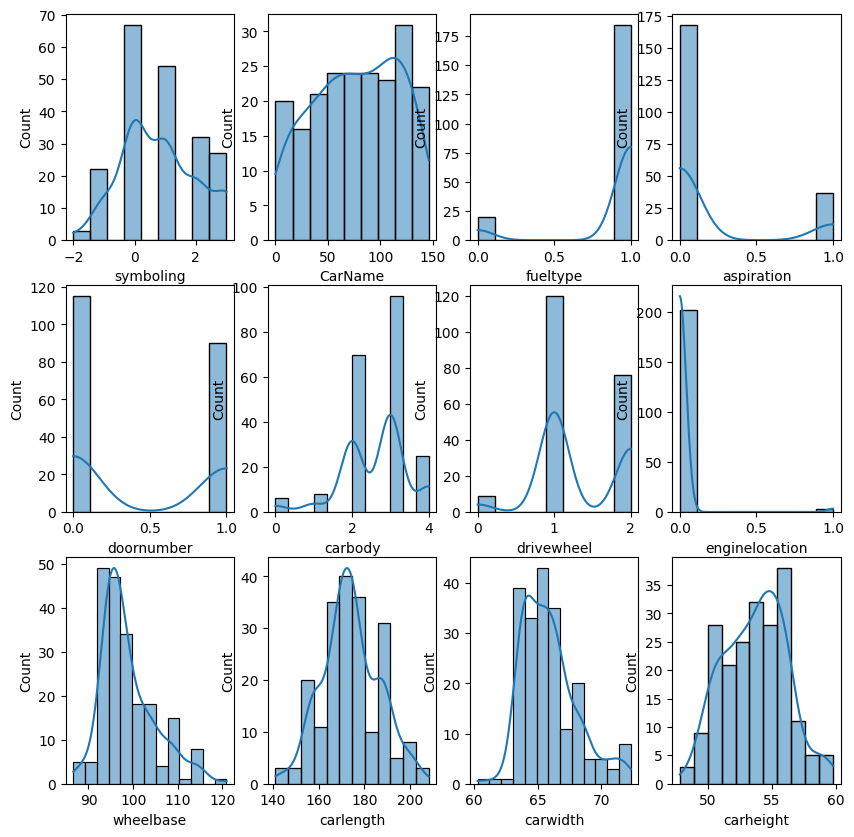

In [316]:
f, axes = plt.subplots(3, 4, figsize=(10,10))
count = 1
for i in range(3):
    for j in range(4):
        sns.histplot(df[df.columns[count]], ax=axes[i][j], kde=True)
        count += 1
plt.show()

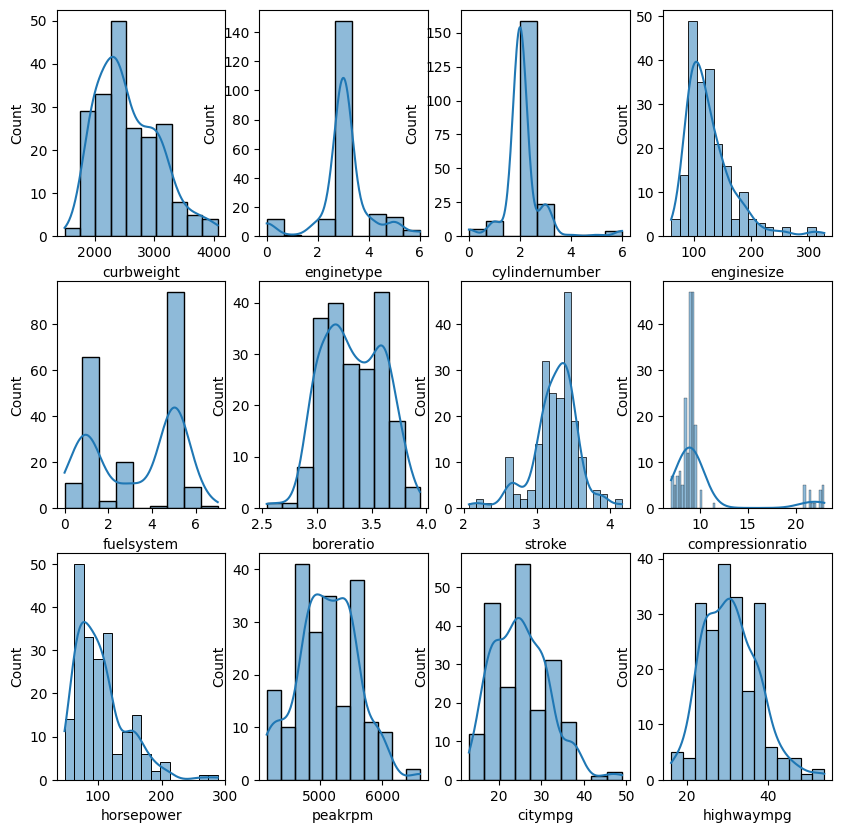

In [317]:
f, axes = plt.subplots(3, 4, figsize=(10,10))
count = 13
for i in range(3):
    for j in range(4):
        sns.histplot(df[df.columns[count]], ax=axes[i][j], kde=True)
        count += 1
plt.show()

<Axes: xlabel='price', ylabel='Count'>

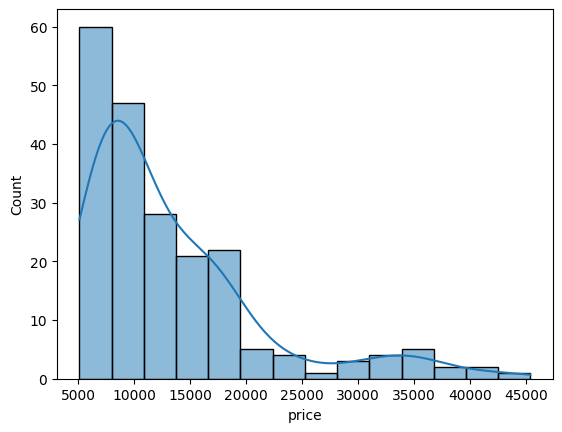

In [318]:
sns.histplot(df.price, kde=True)

In [319]:
#analisando o mapa de calor da correlação das variáveis
df.drop(['car_ID'], axis = 1, inplace = False).corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,0.053016,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.053016,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


In [320]:
#analisando existência de nulos e duplicados
print("Colunas com valores nulos:")
print(df.isna().sum())
print("Total de linhas duplicadas: {}".format(df.duplicated().sum()))

Colunas com valores nulos:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Total de linhas duplicadas: 0


In [321]:
# Normalizando a coluna price
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
df_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [322]:
# Ajustando o modelo via OLS
import statsmodels.formula.api as smf
function = "price~symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength +carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.26e-76
Time:                        22:15:56   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

In [323]:
# A coluna fueltype tem p-value = 0.901, então deve ser retirada
function = "price~symboling+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     69.50
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.70e-77
Time:                        22:15:56   Log-Likelihood:                 275.55
No. Observations:                 205   AIC:                            -503.1
Df Residuals:                     181   BIC:                            -423.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0960      0.077  

In [324]:
# A coluna symboling tem p-value = 0.800, então deve ser retirada
function = "price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.03
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.22e-78
Time:                        22:15:56   Log-Likelihood:                 275.52
No. Observations:                 205   AIC:                            -505.0
Df Residuals:                     182   BIC:                            -428.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0898      0.073  

In [325]:
# A coluna carlength tem p-value = 0.782, então deve ser retirada
function = "price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     76.89
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.76e-79
Time:                        22:15:56   Log-Likelihood:                 275.47
No. Observations:                 205   AIC:                            -506.9
Df Residuals:                     183   BIC:                            -433.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0943      0.071  

In [326]:
# A coluna fuelsystem tem p-value = 0.627, então deve ser retirada
function = "price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     81.06
Date:                Thu, 30 May 2024   Prob (F-statistic):           4.63e-80
Time:                        22:15:56   Log-Likelihood:                 275.34
No. Observations:                 205   AIC:                            -508.7
Df Residuals:                     184   BIC:                            -438.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0872      0.069  

In [327]:
# A coluna cylindernumber tem p-value = 0.596, então deve ser retirada
function = "price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     85.65
Date:                Thu, 30 May 2024   Prob (F-statistic):           5.66e-81
Time:                        22:15:56   Log-Likelihood:                 275.18
No. Observations:                 205   AIC:                            -510.4
Df Residuals:                     185   BIC:                            -443.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0777      0.067  

In [328]:
# A coluna citympg tem p-value = 0.534, então deve ser retirada
function = "price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     90.68
Date:                Thu, 30 May 2024   Prob (F-statistic):           7.09e-82
Time:                        22:15:56   Log-Likelihood:                 274.97
No. Observations:                 205   AIC:                            -511.9
Df Residuals:                     186   BIC:                            -448.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0812      0.067  

In [329]:
# A coluna aspiration tem p-value = 0.572, então deve ser retirada
function = "price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     96.35
Date:                Thu, 30 May 2024   Prob (F-statistic):           8.32e-83
Time:                        22:15:56   Log-Likelihood:                 274.79
No. Observations:                 205   AIC:                            -513.6
Df Residuals:                     187   BIC:                            -453.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0773      0.066  

In [330]:
# A coluna highwaympg tem p-value = 0.496, então deve ser retirada
function = "price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     102.6
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.02e-83
Time:                        22:15:56   Log-Likelihood:                 274.54
No. Observations:                 205   AIC:                            -515.1
Df Residuals:                     188   BIC:                            -458.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0455      0.047  

In [331]:
# A coluna enginetype tem p-value = 0.364, então deve ser retirada
function = "price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     109.5
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.43e-84
Time:                        22:15:56   Log-Likelihood:                 274.09
No. Observations:                 205   AIC:                            -516.2
Df Residuals:                     189   BIC:                            -463.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0316      0.044  

In [332]:
# O intercept tem p-value = 1 então vai ser retirado
function = "price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm-1"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              238.1
Date:                Thu, 30 May 2024   Prob (F-statistic):                   2.35e-114
Time:                        22:15:56   Log-Likelihood:                          273.81
No. Observations:                 205   AIC:                                     -517.6
Df Residuals:                     190   BIC:                                     -467.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [333]:
# A coluna wheelbase tem p-value = 0.198, então deve ser retirada
function = "price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm-1"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              254.0
Date:                Thu, 30 May 2024   Prob (F-statistic):                   3.40e-115
Time:                        22:15:56   Log-Likelihood:                          272.89
No. Observations:                 205   AIC:                                     -517.8
Df Residuals:                     191   BIC:                                     -471.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [334]:
# A coluna wheelbase tem p-value = 0.311, então deve ser retirada
function = "price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm-1"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              254.1
Date:                Thu, 30 May 2024   Prob (F-statistic):                   3.31e-115
Time:                        22:15:57   Log-Likelihood:                          272.92
No. Observations:                 205   AIC:                                     -517.8
Df Residuals:                     191   BIC:                                     -471.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [335]:
# A coluna boreratio tem p-value = 0.156, então deve ser retirada
function = "price~CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm-1"
modelo_ols = smf.ols(formula = function, data = df_norm).fit()
print(modelo_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Thu, 30 May 2024   Prob (F-statistic):                   5.21e-116
Time:                        22:15:57   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

O nosso modelo ajustado então não permanece com o intercepto e possui as colunas CarName, doornumber, carbody, drivewheel, enginelocation, carwidth, carheight, curbweight, enginesize, stroke, compressionratio, horsepower e peakrpm

In [337]:
#Separando as variáveis em explicativas e target
x = df_norm[['CarName', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm']]
y = df_norm[['price']]

In [338]:
# Criando as variáveis de treino e de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [339]:
# Criando modelo de regressão linear
lr = LinearRegression(fit_intercept = False)
lr.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [340]:
# Criando o y_pred_train e calculando o score
lr_score_test = lr.score(x_test, y_test)
print("O coeficiente de determinação R² do modelo é {}".format(lr_score_test))

O coeficiente de determinação R² do modelo é 0.8586689917507385


In [341]:
# Calculando as métricas de treino MAE, MSE e RMSE
y_pred_train = lr.predict(x_train)
print("MAE: {}".format(metrics.mean_absolute_error(y_train, y_pred_train)))
print("MSE: {}".format(metrics.mean_squared_error(y_train, y_pred_train)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))

MAE: 0.046519447543446786
MSE: 0.0035698369083711793
RMSE: 0.05974811217411961


In [342]:
# Calculando as métricas de teste MAE, MSE e RMSE
y_pred_test = lr.predict(x_test)
print("MAE: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred_test)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))

MAE: 0.05223788639465014
MSE: 0.006875980709916921
RMSE: 0.08292153345131119


Verificamos, portanto, que nosso ajuste de modelo via OLS resultou em um dataset normalizado apenas com as variáveis que mais contribuem para o meu modelo de regresão linear, que apresentou no final uma taxa de assertividade de cerca de 94,8% pelo método do erro médio abosluto, que é extremamente elevada. Pelo erro médio quadrático, o erro resultannte foi da ordem de 0,7%.